=== Metrics ===
RMSE : 4.2264451067405355
MAE (AMAT): 3.5186464392076906


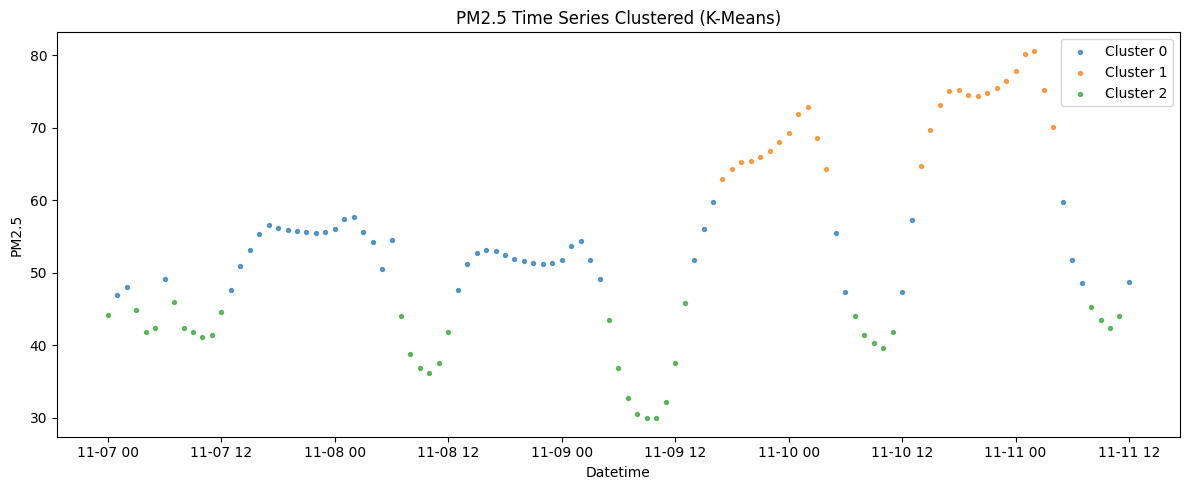

<Figure size 600x400 with 0 Axes>

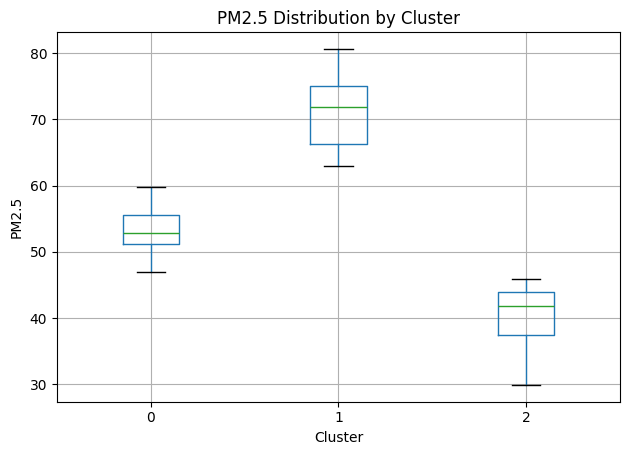

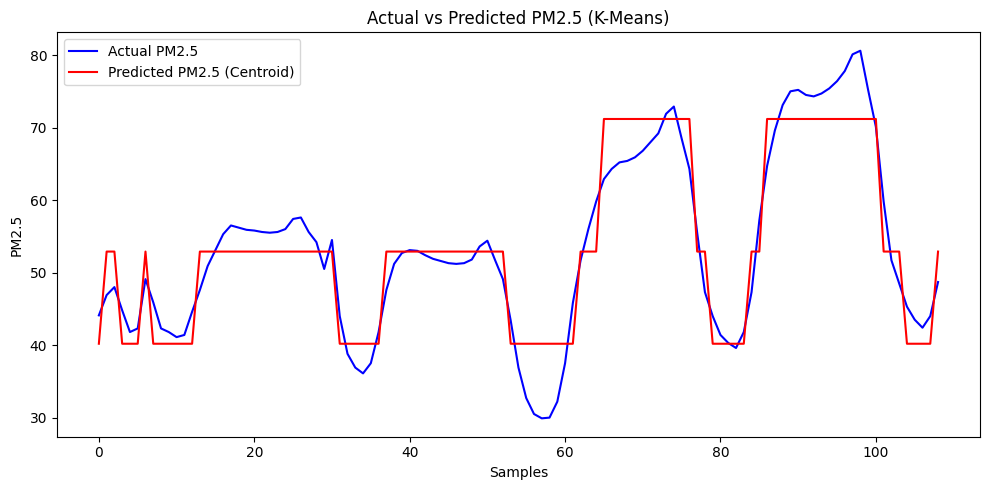

Saved as kanpur_kmeans_labeled.csv


In [5]:
# ============================================================
#   K-Means Clustering on PM2.5 with Actual vs Predicted Plot
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ===========================
# 1. Load the dataset
# ===========================
df = pd.read_csv("kanpur.csv")

# Ensure correct columns
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['PM2.5']).reset_index(drop=True)
df = df.sort_values('datetime')

# ===========================
# 2. Select features
# ===========================
X = df[['PM2.5']].values

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================
# 3. Apply K-Means
# ===========================
k = 3   # clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Inverse transform cluster centers to get PM2.5 centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_pm25 = centers[:, 0]

# Predicted PM2.5 = centroid of assigned cluster
pm25_true = df['PM2.5'].values
pm25_pred = np.array([centers_pm25[label] for label in labels])

# ===========================
# 4. Error Metrics
# ===========================
rmse = np.sqrt(mean_squared_error(pm25_true, pm25_pred))
mae = mean_absolute_error(pm25_true, pm25_pred)

print("=== Metrics ===")
print("RMSE :", rmse)
print("MAE (AMAT):", mae)

# ===========================
# 5. Add cluster labels to dataframe
# ===========================
df['cluster'] = labels

# ===========================
# 6. Plot Time Series Clusters
# ===========================
plt.figure(figsize=(12,5))
for c in sorted(df['cluster'].unique()):
    sub = df[df['cluster'] == c]
    plt.scatter(sub['datetime'], sub['PM2.5'], s=8, alpha=0.7, label=f"Cluster {c}")

plt.title("PM2.5 Time Series Clustered (K-Means)")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")
plt.legend()
plt.tight_layout()
plt.show()

# ===========================
# 7. Boxplot of PM2.5 by Cluster
# ===========================
plt.figure(figsize=(6,4))
df.boxplot(column='PM2.5', by='cluster')
plt.title("PM2.5 Distribution by Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()

# ===========================
# 8. Actual vs Predicted (Line Plot)
# ===========================
plt.figure(figsize=(10,5))
plt.plot(pm25_true, label='Actual PM2.5', color='blue')
plt.plot(pm25_pred, label='Predicted PM2.5 (Centroid)', color='red')
plt.title('Actual vs Predicted PM2.5 (K-Means)')
plt.xlabel('Samples')
plt.ylabel('PM2.5')
plt.legend()
plt.tight_layout()
plt.show()

# ===========================
# 9. Save labeled CSV
# ===========================
df.to_csv("kanpur_kmeans_labeled.csv", index=False)
print("Saved as kanpur_kmeans_labeled.csv")
